### 1) В среде Google Colab создали новый блокнот (notebook). Импортировали необходимые для работы библиотеки и модули. Настроили блокнот для работы с аппаратным ускорителем GPU.

In [26]:
# импорт модулей
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/is_lab4')

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np


In [27]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


### 2) Загрузили набор данных IMDb, содержащий оцифрованные отзывы на фильмы, размеченные на два класса: позитивные и негативные. При загрузке набора данных параметр seed выбрали равным значению (4k – 1)=23, где k=6 – номер бригады. Вывели размеры полученных обучающих и тестовых массивов данных.

In [28]:
# загрузка датасета
from keras.datasets import imdb

vocabulary_size = 5000
index_from = 3

(X_train, y_train), (X_test, y_test) = imdb.load_data(
    path="imdb.npz",
    num_words=vocabulary_size,
    skip_top=0,
    maxlen=None,
    seed=26,
    start_char=1,
    oov_char=2,
    index_from=index_from
    )

# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

Shape of X train: (25000,)
Shape of y train: (25000,)
Shape of X test: (25000,)
Shape of y test: (25000,)


### 3) Вывели один отзыв из обучающего множества в виде списка индексов слов. Преобразовали список индексов в текст и вывели отзыв в виде текста. Вывели длину отзыва. Вывели метку класса данного отзыва и название класса (1 – Positive, 0 – Negative).

In [29]:
# создание словаря для перевода индексов в слова
# заргузка словаря "слово:индекс"
word_to_id = imdb.get_word_index()
# уточнение словаря
word_to_id = {key:(value + index_from) for key,value in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3
# создание обратного словаря "индекс:слово"
id_to_word = {value:key for key,value in word_to_id.items()}

In [33]:
print(X_train[26])
print('len:',len(X_train[26]))

[1, 4, 78, 46, 304, 39, 2, 7, 968, 2, 295, 209, 101, 147, 65, 10, 10, 2643, 2, 497, 8, 30, 6, 147, 284, 5, 996, 174, 10, 10, 11, 4, 130, 4, 2, 4979, 11, 2, 10, 10, 2]
len: 41


In [34]:
review_as_text = ' '.join(id_to_word[id] for id in X_train[26])
print(review_as_text)
print('len:',len(review_as_text))

<START> the bad out takes from <UNK> of fire <UNK> together without any real story br br dean <UNK> tries to be a real actor and fails again br br in the end the <UNK> quit in <UNK> br br <UNK>
len: 193


### 4) Вывели максимальную и минимальную длину отзыва в обучающем множестве.

In [35]:
print('MAX Len: ',len(max(X_train, key=len)))
print('MIN Len: ',len(min(X_train, key=len)))

MAX Len:  2494
MIN Len:  11


### 5) Провели предобработку данных. Выбрали единую длину, к которой будут приведены все отзывы. Короткие отзывы дополнили спецсимволами, а длинные обрезали до выбранной длины.

In [36]:
# предобработка данных
from tensorflow.keras.utils import pad_sequences
max_words = 500
X_train = pad_sequences(X_train, maxlen=max_words, value=0, padding='pre', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_words, value=0, padding='pre', truncating='post')

### 6) Повторили пункт 4.

In [37]:
print('MAX Len: ',len(max(X_train, key=len)))
print('MIN Len: ',len(min(X_train, key=len)))

MAX Len:  500
MIN Len:  500


### 7) Повторили пункт 3. Сделали вывод о том, как отзыв преобразовался после предобработки.

In [38]:
print(X_train[26])
print('len:',len(X_train[26]))

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [39]:
review_as_text = ' '.join(id_to_word[id] for id in X_train[26])
print(review_as_text)
print('len:',len(review_as_text))

<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD

#### После обработки в начало отзыва добавилось необходимое количество токенов <PAD>, чтобы отзыв был длинной в 500 индексов.

### 8) Вывели предобработанные массивы обучающих и тестовых данных и их размерности.

In [ ]:
# вывод данных
print('X train: \n',X_train)
print('X train: \n',X_test)

# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of X test:', X_test.shape)

X train: 
 [[   0    0    0 ... 1039    7   12]
 [   0    0    0 ...    5    2 1773]
 [   0    0    0 ...  220  175   96]
 ...
 [   1 3264  153 ...  157  746   14]
 [   0    0    0 ... 3459   55  680]
 [   0    0    0 ...   14   31   56]]
X train: 
 [[   0    0    0 ...  241 3366   56]
 [   0    0    0 ...   18    4  755]
 [   0    0    0 ...  149   14   20]
 ...
 [   0    0    0 ...    2 2152 1835]
 [   0    0    0 ... 3768 3508 3311]
 [   0    0    0 ...  511    8 2725]]
Shape of X train: (25000, 500)
Shape of X test: (25000, 500)


### 9) Реализовали модель рекуррентной нейронной сети, состоящей из слоев Embedding, LSTM, Dropout, Dense, и обучили ее на обучающих данных с выделением части обучающих данных в качестве валидационных. Вывели информацию об архитектуре нейронной сети. Добились качества обучения по метрике accuracy не менее 0.8.

In [ ]:
embed_dim = 32
lstm_units = 64

model = Sequential()
model.add(layers.Embedding(input_dim=vocabulary_size, output_dim=embed_dim, input_length=max_words, input_shape=(max_words,)))
model.add(layers.LSTM(lstm_units))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 500, 32)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,897 (722.25 KB)

 Trainable params: 184,897 (722.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# компилируем и обучаем модель
batch_size = 64
epochs = 3
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9593 - loss: 0.1184 - val_accuracy: 0.8632 - val_loss: 0.4331
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9652 - loss: 0.1055 - val_accuracy: 0.8722 - val_loss: 0.5389
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9741 - loss: 0.0829 - val_accuracy: 0.8648 - val_loss: 0.4959


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_acc}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8566 - loss: 0.5214

Test accuracy: 0.8555999994277954


### 10) Оценили качество обучения на тестовых данных:
### - вывели значение метрики качества классификации на тестовых данных
### - вывели отчет о качестве классификации тестовой выборки  
### - построили ROC-кривую по результату обработки тестовой выборки и вычислили площадь под ROC-кривой (AUC ROC)

In [ ]:
#значение метрики качества классификации на тестовых данных
print(f"\nTest accuracy: {test_acc}")


Test accuracy: 0.8555999994277954


In [ ]:
#отчет о качестве классификации тестовой выборки
y_score = model.predict(X_test)
y_pred = [1 if y_score[i,0]>=0.5 else 0 for i in range(len(y_score))]

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels = [0, 1], target_names=['Negative', 'Positive']))

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step
              precision    recall  f1-score   support

    Negative       0.85      0.87      0.86     12500
    Positive       0.87      0.84      0.85     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



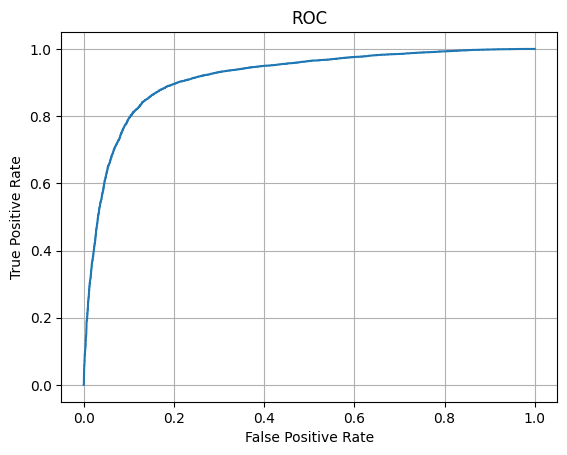

AUC ROC: 0.9165464031999999


In [ ]:
#построение ROC-кривой и AUC ROC
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_score)
plt.plot(fpr, tpr)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('AUC ROC:', auc(fpr, tpr))

### 11) Сделали выводы по результатам применения рекуррентной нейронной сети для решения задачи определения тональности текста.  

Таблица1:

| Модель   | Количество настраиваемых параметров | Количество эпох обучения | Качество классификации тестовой выборки |
|----------|-------------------------------------|---------------------------|-----------------------------------------|
| Рекуррентная | 184 897                              | 3                        | accuracy:0.8556     ; loss:0.5214     ; AUC ROC:0.9165                                   |


#### По результатам применения рекуррентной нейронной сети, а также по данным таблицы 1 можно сделать вывод, что модель хорошо справилась с задачей определения тональности текста. Показатель accuracy = 0.8556 превышает требуемый порог 0.8. Значение AUC ROC = 0.9165 (> 0.9) говорит о высокой способности модели различать два класса (положительные и отрицательные отзывы).